# Лабораторная работа № 4

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
from sklearn.metrics import confusion_matrix, silhouette_score, precision_score, recall_score,accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
#подключение библиотек

## Анализ предметной области:

Датасет 2liver.csv содержит информацию о заболеваемости печени.
Столбцы хранят такую информацию, как:

1.	Возраст пациента
2.	Пол пациента
3.	Общий билирубин
4.	Прямой билирубин
5.	Щелочная фосфатаза
6.	Аламиноаминотрансфераза
7.	Аспартатаминотрансфераза
8.	Всего белков
9.	Альбумин
10.	Соотношение альбуминов и глобулинов
11.	Цель: поле, используемое для разделения данных на два набора (пациент с заболеванием печени или без заболевания).

Вывод первых 20 строк набора данных осуществляется с помощью функции head() библиотеки pandas.

In [2]:
df = pandas.read_csv('C:\\Users\\Alina\\OneDrive\\Рабочий стол\\андан\\liver.csv',index_col=0)
#полученые данных из файла с датасетом в переменнную df
display(df.head(20))
#вывод первых 20 значений датасета

,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
Age,,,,,,,,,,
65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
46,Male,1.8,0.7,208.0,19,14,7.6,4.4,1.30,1
26,Female,0.9,0.2,154.0,16,12,7.0,3.5,1.00,1
29,Female,0.9,0.3,202.0,14,11,6.7,3.6,1.10,1
17,Male,0.9,0.3,202.0,22,19,7.4,4.1,1.20,2


Предметной областью анализа является набор данных с биомедицинской информацией о заболевании печени. В датасете содержатся результаты анализов, показывающие состояние печени пациента, на основании которых сделаны выводы о том, что человек болен или здоров.

Метод describe () используется для вычисления некоторых статистических данных, таких как процентиль, среднее значение и стандартное отклонение различных числовых значений датафрейма.

In [3]:
df.describe()
# создание описательной статистики

,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,585.000000,587.000000,586.000000,587.000000,587.000000,587.000000,583.000000
mean,3.284957,1.477342,289.965870,80.354344,6.484327,3.146337,0.949485
std,6.201583,2.800911,242.504304,182.048677,1.083160,0.796194,0.320253
min,0.400000,0.100000,63.000000,10.000000,2.700000,0.900000,0.300000
25%,0.800000,0.200000,175.250000,23.000000,5.800000,2.600000,0.700000
50%,1.000000,0.300000,208.000000,35.000000,6.600000,3.100000,0.950000
75%,2.600000,1.300000,298.000000,60.000000,7.200000,3.800000,1.100000
max,75.000000,19.700000,2110.000000,2000.000000,9.600000,5.500000,2.800000


 *С помощью данного метода можно сделать вывод о числовых данных каждого отдельного столбца. 
Например, средний возраст пациентов 45 лет, наименьший возраст - 4 года, а наибольший - 90 лет. Также, в датафрейме большее количество людей с заболеванием печени, так как среднее значение столбца здоровья 1.28.*

## Предобработка данных:

In [4]:
df.info()
#оценка данных и пропущенных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 65 to 40
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      587 non-null    object 
 1   TotalBilirubin              585 non-null    float64
 2   Direct_Bilirubin            587 non-null    float64
 3   Alkaline_Phosphotase        586 non-null    float64
 4   Alamine_Aminotransferase    587 non-null    int64  
 5   Aspartate_Aminotransferase  587 non-null    object 
 6   Total_Protiens              587 non-null    float64
 7   Albumin                     587 non-null    float64
 8   Albumin_and_Globulin_Ratio  583 non-null    float64
 9   Dataset123                  587 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 50.4+ KB


По результатам использования метода info() для оценки данных можно сделать вывод, что столбец TotalBilirubin, Alkaline_Phosphotase и Albumin_and_Globulin_Ratio имеют пропущенные значения, а значения столбеца Dataset123 и Aspartate_Aminotransferase имеют неправильный тип данных.

In [5]:
df.columns
#названия столбцов для проверки на корректность

Index(['Gender', 'TotalBilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Dataset123'],
      dtype='object')

Названия данных столбцов не точно отображают содержимое данных столбцов, а также, для наглядности необходимо, чтобы названия были указаны в змеином регистре, поэтому для изменений названий нужно воспользоваться методом rename().

In [6]:
df = df.rename(columns={'Age':'age', 'Gender': 'gender', 'TotalBilirubin': 'total_bilirubin', 'Direct_Bilirubin': 'direct_bilirubin', 
                        'Alkaline_Phosphotase':'alkaline_phosphotase','Alamine_Aminotransferase': 'alamine_aminotransferase',
                        'Aspartate_Aminotransferase': 'aspartate_aminotransferase','Total_Protiens': 'total_protiens',
                        'Albumin': 'albumin','Albumin_and_Globulin_Ratio': 'albumin_and_globulin_ratio', 
                        'Dataset123': 'healthy'})
#изменение названая столбцов

Далее требуется проверить изменения в названии столбцов методом columns.

In [7]:
df.columns
#названия столбцов для проверки на корректность

Index(['gender', 'total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase',
       'alamine_aminotransferase', 'aspartate_aminotransferase',
       'total_protiens', 'albumin', 'albumin_and_globulin_ratio', 'healthy'],
      dtype='object')

Проверка пропущенных значений осуществляется с помощью метода isna(), а isna().sum() находит сумму пропущенных значений по столбцам.

In [8]:
print(df.isna().sum())
#сумма пропущенных значений по столбцам

gender                        0
total_bilirubin               2
direct_bilirubin              0
alkaline_phosphotase          1
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
healthy                       0
dtype: int64


Нужно удалить все строки со значениями NaN, используя метод dropna(), который удаляет все строки со значениями NaN.  Удаление данных не повлияет на итоговые значения анализа, так как пропущенные значения являются незначительной долей данных в датасете.

In [9]:
df = df.dropna()
#удаление отсутствующих значений
print(df.isna().sum())
#проверка наличия отсутствующих значений

gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
healthy                       0
dtype: int64


Сумма пропущенных значений по всем столбцам равна нулю, что означает, что все пропущенные значения были удалены. 

Также необходимо проверить данные на наличие дубликатов, используя метод duplicated().sum() 

In [10]:
print(df.duplicated().sum())
#проверка наличия дубликатов

15


Так как дубликаты присутствуют, необходимо их удалить с помощью метода drop_duplicates(). Удаление данных не повлияет на итоговые значения анализа, так как дубликаты являются незначительной долей данных в датасете (доля 0.025 от всего датасета). 

In [11]:
df = df.drop_duplicates()
#удаление дубликатов
print(df.duplicated().sum())
#проверка наличия дубликатов после удаления

0


Удаление выполнено успешно, так как повторяющихся данных не осталось. После удаления строчек нужно обновить индексацию, чтобы в ней не осталось пропусков, используя метод reset_index(). Он создаст новый датафрейм, где индексы исходного датафрейма станут новой колонкой с названием index и все строки получат обычные индексы, но уже без пропусков.

In [12]:
df = df.drop_duplicates().reset_index()
#обновление индексации

Далее необходимо воспользоваться методом info() для проверки корректности типов данных по столбцам.

In [13]:
df.info()
#проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         565 non-null    int64  
 1   gender                      565 non-null    object 
 2   total_bilirubin             565 non-null    float64
 3   direct_bilirubin            565 non-null    float64
 4   alkaline_phosphotase        565 non-null    float64
 5   alamine_aminotransferase    565 non-null    int64  
 6   aspartate_aminotransferase  565 non-null    object 
 7   total_protiens              565 non-null    float64
 8   albumin                     565 non-null    float64
 9   albumin_and_globulin_ratio  565 non-null    float64
 10  healthy                     565 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 48.7+ KB


По результатам проверки можно сделать вывод, что некоторые колонки имеют неправильный тип данных, который необходимо изменить для упрощения дальнейшей работы с данными. Для замены типа данных нужно воспользоваться методом astype().

Столбец 'aspartate_aminotransferase' имеет строковый тип данных, который невозможно изменить из-за некорректного значения в одной из строк. Для этого значение нужно изменить с помощью метода replace(). Аналогично столбец 'healthy' вместо числовых значений в одной из строк содержит значение 'yes'.


In [14]:
df['aspartate_aminotransferase'] = df['aspartate_aminotransferase'].replace('3a4', '34')
df['healthy'] = df['healthy'].replace('yes', '1')
#обработка некорректного значения данных

Теперь строковый тип данных можно изменить на числовой без ошибок.

In [15]:
df['aspartate_aminotransferase'] = df['aspartate_aminotransferase'].astype('int')
df['healthy'] = df['healthy'].astype('int')
#изменеие типов данных
df.info()
#проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         565 non-null    int64  
 1   gender                      565 non-null    object 
 2   total_bilirubin             565 non-null    float64
 3   direct_bilirubin            565 non-null    float64
 4   alkaline_phosphotase        565 non-null    float64
 5   alamine_aminotransferase    565 non-null    int64  
 6   aspartate_aminotransferase  565 non-null    int32  
 7   total_protiens              565 non-null    float64
 8   albumin                     565 non-null    float64
 9   albumin_and_globulin_ratio  565 non-null    float64
 10  healthy                     565 non-null    int32  
dtypes: float64(6), int32(2), int64(2), object(1)
memory usage: 44.3+ KB


Осуществить поиск неявных дубликатов можно с помощью метода unique().

In [16]:
for i in range(1, 11):
    a = df.columns[i]
    if df.dtypes[i] == 'object':
        print(df[a].unique())
#поиск неявных дубликатов по строковым значениям

['Female' 'Male' 'Mal']


Найдены неявные дубликаты 'Male' и 'Mal', необходимо отредактировать опечатку для получения корректных данных.

In [17]:
df['gender'] = df['gender'].replace('Mal', 'Male')
#обработка некорректного значения данных

Необходимо убедиться в отсутсвии неявных дубликатов.

In [18]:
for i in range(1, 11):
    a = df.columns[i]
    if df.dtypes[i] == 'object':
        print(df[a].unique())
#проверка наличия неявных дубликатов после обработки

['Female' 'Male']


## Разбиение набора данных на тренировочной и тестовый датасеты:

Необходимо разделить данные на тренировочные и тестовые, используя train_test_split. Перед этим необходимо подготовить данные, убрав строковые значения. 

Параметр random_state позволяет получить воспроизводимые результаты при повторном запуске программы. 

In [19]:
rng = np.random.RandomState(0) # получение воспроизводимых результатов
new_df = df.drop(['gender'], axis = 1) # убираем строковые значения

Необходимо подготовить данные, убрав строковые значения и целевой параметр здоровья. X — это все данные с их характеристиками, а Y — соответствующее выходное значение, которое необходимо предсказать.

Чтобы задать матрицу объект-признак X и вектор целевой переменной y, применим метод drop() библиотеки Pandas. Параметр axis = 1 указывает, что избавиться нужно именно от колонки.

In [20]:
df_1, df_2 = train_test_split(new_df, shuffle=False)
Y = df_1['healthy'] # целевой параметр
X = df_1.drop(['healthy'], axis=1) # датасет без целевого парамера здоровья
x_train,x_test,y_train,y_test = train_test_split(X, Y, train_size=0.9, random_state=rng) 
# разиваем первый датасет на тестовые и тренировочные данные

Также необохдимо стандартизировать данные: для каждого наблюдения из исходного значения признака вычитается среднее, а полученная разность делится на стандартное отклонение.

In [21]:
sc = StandardScaler() # создаётся объект класса scaler
# стандартизация тренировочных и тестовых данных перед работой с алгоритмами
x_train = sc.fit_transform(x_train) # стандартизация
x_test = sc.fit_transform(x_test) 

## Метод k-ближайших соседей:

Метод ближайших соседей — простейший метрический классификатор, основанный на оценивании сходства объектов. Классифицируемый объект относится к тому классу, которому принадлежат ближайшие к нему объекты обучающей выборки.

Метод осуществляется с помощью функции KNeighborsClassifier() библиотеки scipy, с указанием параметра количества соседей n_neighbors, по умолчанию это значение равно 5.

In [22]:
neighbors = KNeighborsClassifier(n_neighbors=7) # классификатор, реализующий метод k-ближайших соседей
pr = neighbors.fit(x_train,y_train).predict(x_test) # применяем алгоритм к данным и формируем вектор кластеров

Необходимо использовать функцию confusion_matrix() для оценки точности классификации. Это особый вид таблицы непредвиденных обстоятельств с двумя измерениями («фактическое» и «прогнозируемое») и идентичными наборами «классов» в обоих измерениях (каждая комбинация измерения и class - это переменная в таблице непредвиденных обстоятельств). Метод .ravel() позволяет преобразовать матрицу к сводному (одномерному) списку [TN, FP, FN, TP].

- TP — true positive: классификатор верно отнёс объект к рассматриваемому классу.
- TN — true negative: классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.
- FP — false positive: классификатор неверно отнёс объект к рассматриваемому классу.
- FN — false negative: классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

*У качественной модели большая часть прогнозов должна попадать в группы TP и TN.*

In [23]:
cm = confusion_matrix(y_test, pr) # матрица неточностей
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
print(cm.ravel()) # преобразование матрицы к списку

True positive =  21
False positive =  2
False negative =  14
True negative =  6
[21  2 14  6]


Наилучшие результаты достигаются при числе n_neighbors=7. При количестве соседей равном 2: TP =  22, FP =  1, FN =  19, TN =  1.
При количестве соседей равном 4: TP =  21, FP =  2, FN =  18, TN =  2.

Эти же результаты подтвержают показатели метрик:
- accuracy: доля правильных ответов, находится по формуле (tp + tn)/(tp+tn+fp+fn)
- precision: точность, находится по формуле tp / (tp + fp)
- recall: полнота, находится по формуле tp / (tp + fn)
- f1: cводная метрика, учитывающая баланс между метриками, находится по формуле (2 * precision * recall)/(precision + recall)
- balanced_accuracy: определяется как среднее арифметическое значение  чувствительности и специфичности, находится по формуле (TP / (TP + FN) + TN / (TN + FP))/2 или (sensitivity + specifity)/2

In [24]:
# подсчет метрик
print(accuracy_score(y_test, pr))
print(precision_score(y_test, pr))
print(recall_score(y_test, pr))
print(f1_score(y_test, pr))
print(balanced_accuracy_score(y_test, pr))

0.627906976744186
0.6
0.9130434782608695
0.7241379310344828
0.6065217391304347


Наилучшие результаты метрик получились при количестве соседей, равном 7. Наилучший показатель recall отражает, что умение классификатора находить все положительные объекты класса абсолютно точно. Несмотря на это, худший показатель precision отражает, что все положительные объекты, которые считались положительными классифицированы с точностью только 60%. Сводная метрика f1 также показывает неплохой результат.

Для оценки качества классификатора (модели классификации) применяют метрику roc_auc, или площадь под кривой ошибок.

ROC-кривая — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (true positive rate - чувствительность алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (false positive rate - величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

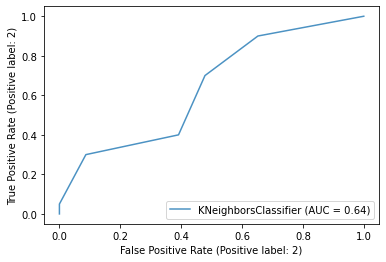

In [25]:
ax = plt.gca()
# Визуализация ROC-кривой 
Roc = RocCurveDisplay.from_estimator(neighbors, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

Проверим данную метрику для различного числа n_neighbors, чтобы убедится, что наибольшее значение достигается при установленном количестве соседей.

In [26]:
max_count = 0
num_nei = 0
balanc = 0
for i in range(1, 22): # нахождение максимального значения по метрике 
    neighbors = KNeighborsClassifier(n_neighbors=i)
    pr = neighbors.fit(x_train,y_train).predict(x_test)
    if f1_score(y_test, pr) > max_count or balanced_accuracy_score(y_test, pr) > balanc:
        max_count = f1_score(y_test, pr)
        num_nei = i
        balanc = balanced_accuracy_score(y_test, pr)
print('Значение f1:', max_count,'Кол-во соседей:', num_nei, 'Значение balanced_accuracy:', balanc)

Значение f1: 0.7540983606557378 Кол-во соседей: 11 Значение balanced_accuracy: 0.625


При числе соседей 11, метрика f1 дает результат 0.7540983606557378, а balanced_accuracy дает значение 0.625.
При числе соседей 7, метрика f1 дает результат 0.9130434782608695, а balanced_accuracy дает значение 0.6065217391304347. 
Так как реультаты метрики f1 значительно улучшаются при 7 соседях, а значение balanced_accuracy изменяется всего на 0.02, а AUC в обоих случах 0.64, было принято решение установить n_neighbors=7.

## Логистическая регрессия

Логистическая регрессия — статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. Эта регрессия выдаёт ответ в виде вероятности бинарного события (1 или 0).

Ее создание осуществляется с помощью функции LogisticRegression() библиотеки scipy.

In [27]:
logistic = LogisticRegression() # Классификатор логистической регрессии
pr_log = logistic.fit(x_train, y_train).predict(x_test)

In [28]:
cm = confusion_matrix(y_test, pr_log) # матрица неточностей
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
print(cm.ravel()) # преобразование матрицы к списку

True positive =  20
False positive =  3
False negative =  15
True negative =  5
[20  3 15  5]


Наибольшее число значений попало в True positive и False negative, что является хорошим показателем. Необходимо также проанализировать метрики.

In [29]:
# подсчет метрик
print(accuracy_score(y_test, pr_log))
print(precision_score(y_test, pr_log))
print(recall_score(y_test, pr_log))
print(f1_score(y_test, pr_log))
print(balanced_accuracy_score(y_test, pr_log))

0.5813953488372093
0.5714285714285714
0.8695652173913043
0.689655172413793
0.5597826086956521


Данные метрики оказались довольно высокими, но хуже, чем метрики, полученные методом к-ближайших соседей.

Необходимо визуализировать roc-кривую для логистической регрессии.

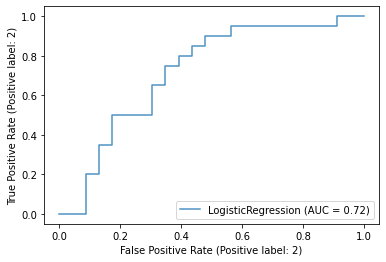

In [30]:
ax = plt.gca() # Визуализация ROC-кривой 
Roc = RocCurveDisplay.from_estimator(logistic, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

Несмотря на это, показатель AUC линейной регресси оказался больше, чем полученный методом к-ближайших соседей, что говорит о более качественной классификации.

## Cлучайный лес

Метод случайного леса — алгоритм машинного обучения, заключающийся в использовании комитета (ансамбля) решающих деревьев. Алгоритм сочетает в себе две основные идеи: метод бэггинга Бреймана и метод случайных подпространств. Алгоритм применяется для задач классификации, регрессии и кластеризации. Основная идея заключается в использовании большого ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества результат получается хорошим.

Реализуется данный алгоритм с помощью RandomForestClassifier() библиотеки scipy. 

In [31]:
random_forest = RandomForestClassifier() # Классификатор метода random forest
pr_random = random_forest.fit(x_train, y_train).predict(x_test)

Необходимо также проанализировать матрица неточностей и метрики.

In [32]:
cm = confusion_matrix(y_test, pr_log) # матрица неточностей
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
print(cm.ravel()) # преобразование матрицы к списку

True positive =  20
False positive =  3
False negative =  15
True negative =  5
[20  3 15  5]


In [33]:
print(accuracy_score(y_test, pr_log)) # подсчет метрик
print(precision_score(y_test, pr_log))
print(recall_score(y_test, pr_log)) 
print(f1_score(y_test, pr_log))
print(balanced_accuracy_score(y_test, pr_log))

0.5813953488372093
0.5714285714285714
0.8695652173913043
0.689655172413793
0.5597826086956521


Показатели метрик также не очень высокие, относительно других методов классификации. Необходимо также визуализировать roc-кривую для метода random forest. 

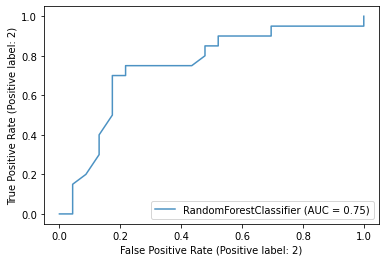

In [34]:
ax = plt.gca() # Визуализация ROC-кривой
Roc = RocCurveDisplay.from_estimator(random_forest, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

Но при этом показатель AUC самый высокий = 0.80, тогда как этот показатель логистической регрессии дает значение только 0.72, а метод к-ближайших соседей только 0.64.

Необходимо построить roc-кривую для каждого метода классификации на одном графике.

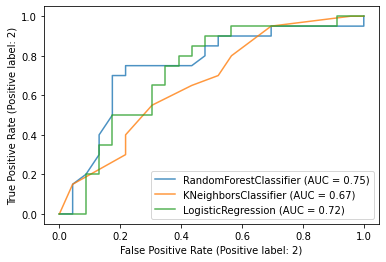

In [35]:
ax = plt.gca() # Визуализация ROC-кривых
Roc = RocCurveDisplay.from_estimator(random_forest, x_test, y_test, ax=ax, alpha=0.8)
Roc = RocCurveDisplay.from_estimator(neighbors, x_test, y_test, ax=ax, alpha=0.8)
Roc = RocCurveDisplay.from_estimator(logistic, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

Визуализация наглядно демонстрирует разницу между значениями AUC разных классификаций и доказывает, что наиболее качественная классификация достигается при использовании метода Случайного леса (random forest)

## Вывод:

Подводя итоги, можно сделать вывод, что метод случайного леса (random forest) классифицирует данные наиболее точно. При этом самые высокие показатели матрицы неточностей (наибольшее распределение в True positive и False negative), а также различные метрики, такие как Accuracy, Precision, Recall,F1, Balanced accuracy - были у логистической регрессии и метода к-ближайших соседей.

## Доп. задание:

In [36]:
max_count = 0
num_nei = 0
balanc = 0
for i in range(1, 22): # нахождение максимального значения по метрике 
    neighbors = KNeighborsClassifier(n_neighbors=i)
    pr = neighbors.fit(x_train,y_train).predict(x_test)
    if f1_score(y_test, pr) > max_count or balanced_accuracy_score(y_test, pr) > balanc:
        max_count = f1_score(y_test, pr)
        num_nei = i
        balanc = balanced_accuracy_score(y_test, pr)
print('Значение f1:', max_count,'Кол-во соседей:', num_nei, 'Значение balanced_accuracy:', balanc)

Значение f1: 0.7540983606557378 Кол-во соседей: 11 Значение balanced_accuracy: 0.625


При числе соседей 11, метрика f1 дает результат 0.7540983606557378, а balanced_accuracy дает значение 0.625.
При числе соседей 7, метрика f1 дает результат 0.9130434782608695, а balanced_accuracy дает значение 0.6065217391304347. 
Так как реультаты метрики f1 значительно улучшаются при 7 соседях, а значение balanced_accuracy изменяется всего на 0.02, а AUC в обоих случах 0.64, было принято решение установить n_neighbors=7.